## Preprocessing

## Importing the file for preprocessing

In [35]:
import pandas as pd
df = pd.read_csv('heart_data.csv')

print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

## CHECKING FOR NULL VALUES

We are lucky in this dataset as we do not encounter any null values

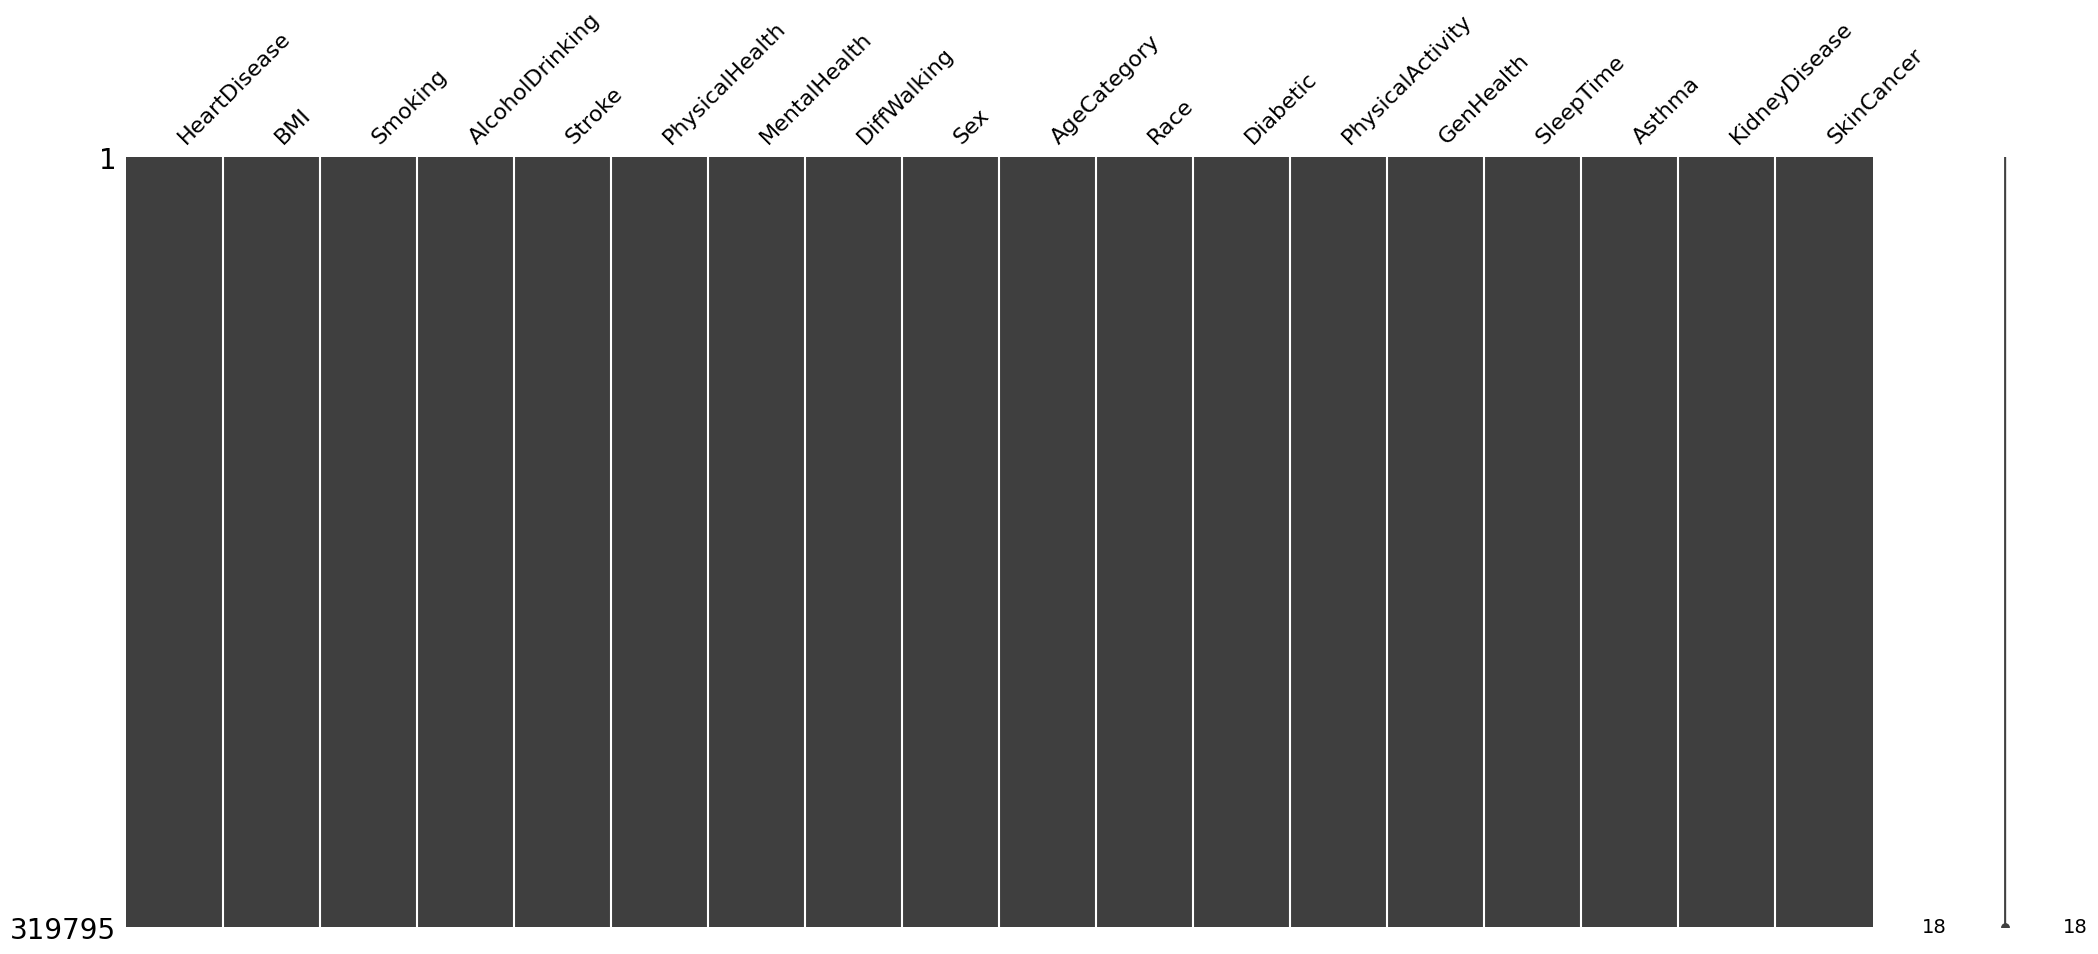

<Figure size 1500x900 with 0 Axes>

In [36]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.figure(figsize=(15, 9 ))
plt.show()


C:\Users\dylan\AppData\Local\Temp\ipykernel_14944\1273517605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])


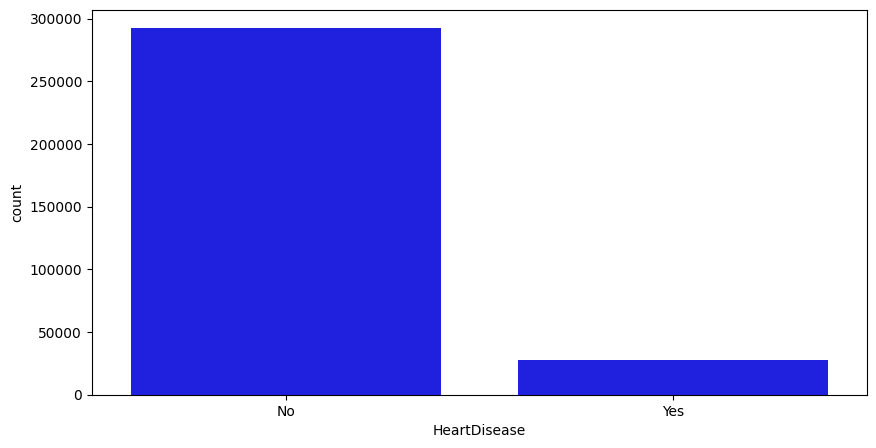

In [37]:
import seaborn as sns
plt.figure(figsize=(10,5))
custom_palette = ["#0000ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])
plt.show()


In [38]:
# Calculate the number of rows to delete
num_rows_to_delete = int(0.92 * len(df[df['HeartDisease'] == 'No']))

# Get indices of rows where HeartDisease is "No"
indices_to_delete = df[df['HeartDisease'] == 'No'].sample(n=num_rows_to_delete).index

# Drop rows by indices
df.drop(indices_to_delete, inplace=True)

C:\Users\dylan\AppData\Local\Temp\ipykernel_14944\3497551675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])


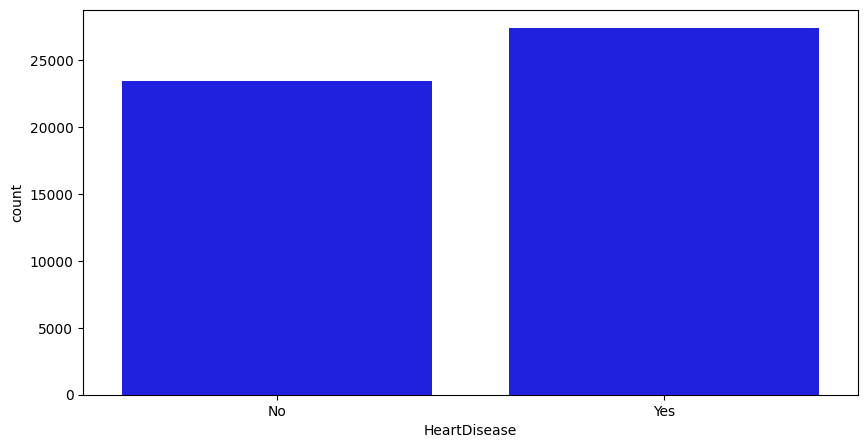

In [39]:
plt.figure(figsize=(10,5))
custom_palette = ["#0000ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])
plt.show()

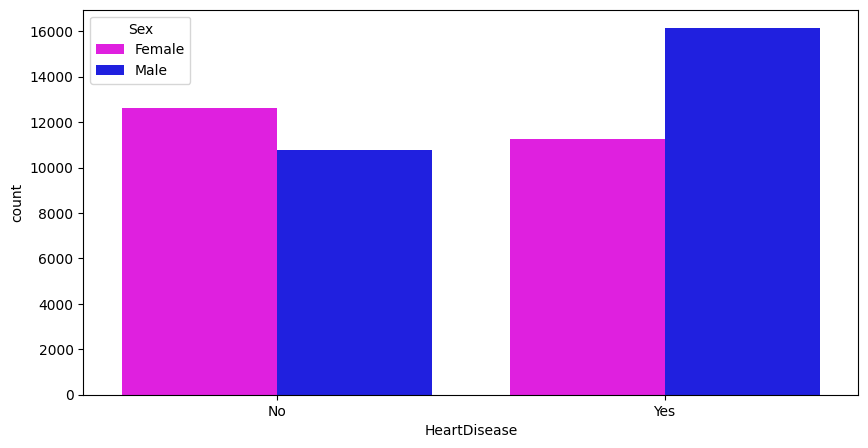

In [40]:
import seaborn as sns

plt.figure(figsize=(10,5))
custom_palette = ["#ff00ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, hue='Sex', order = ['No', 'Yes'])
plt.show()

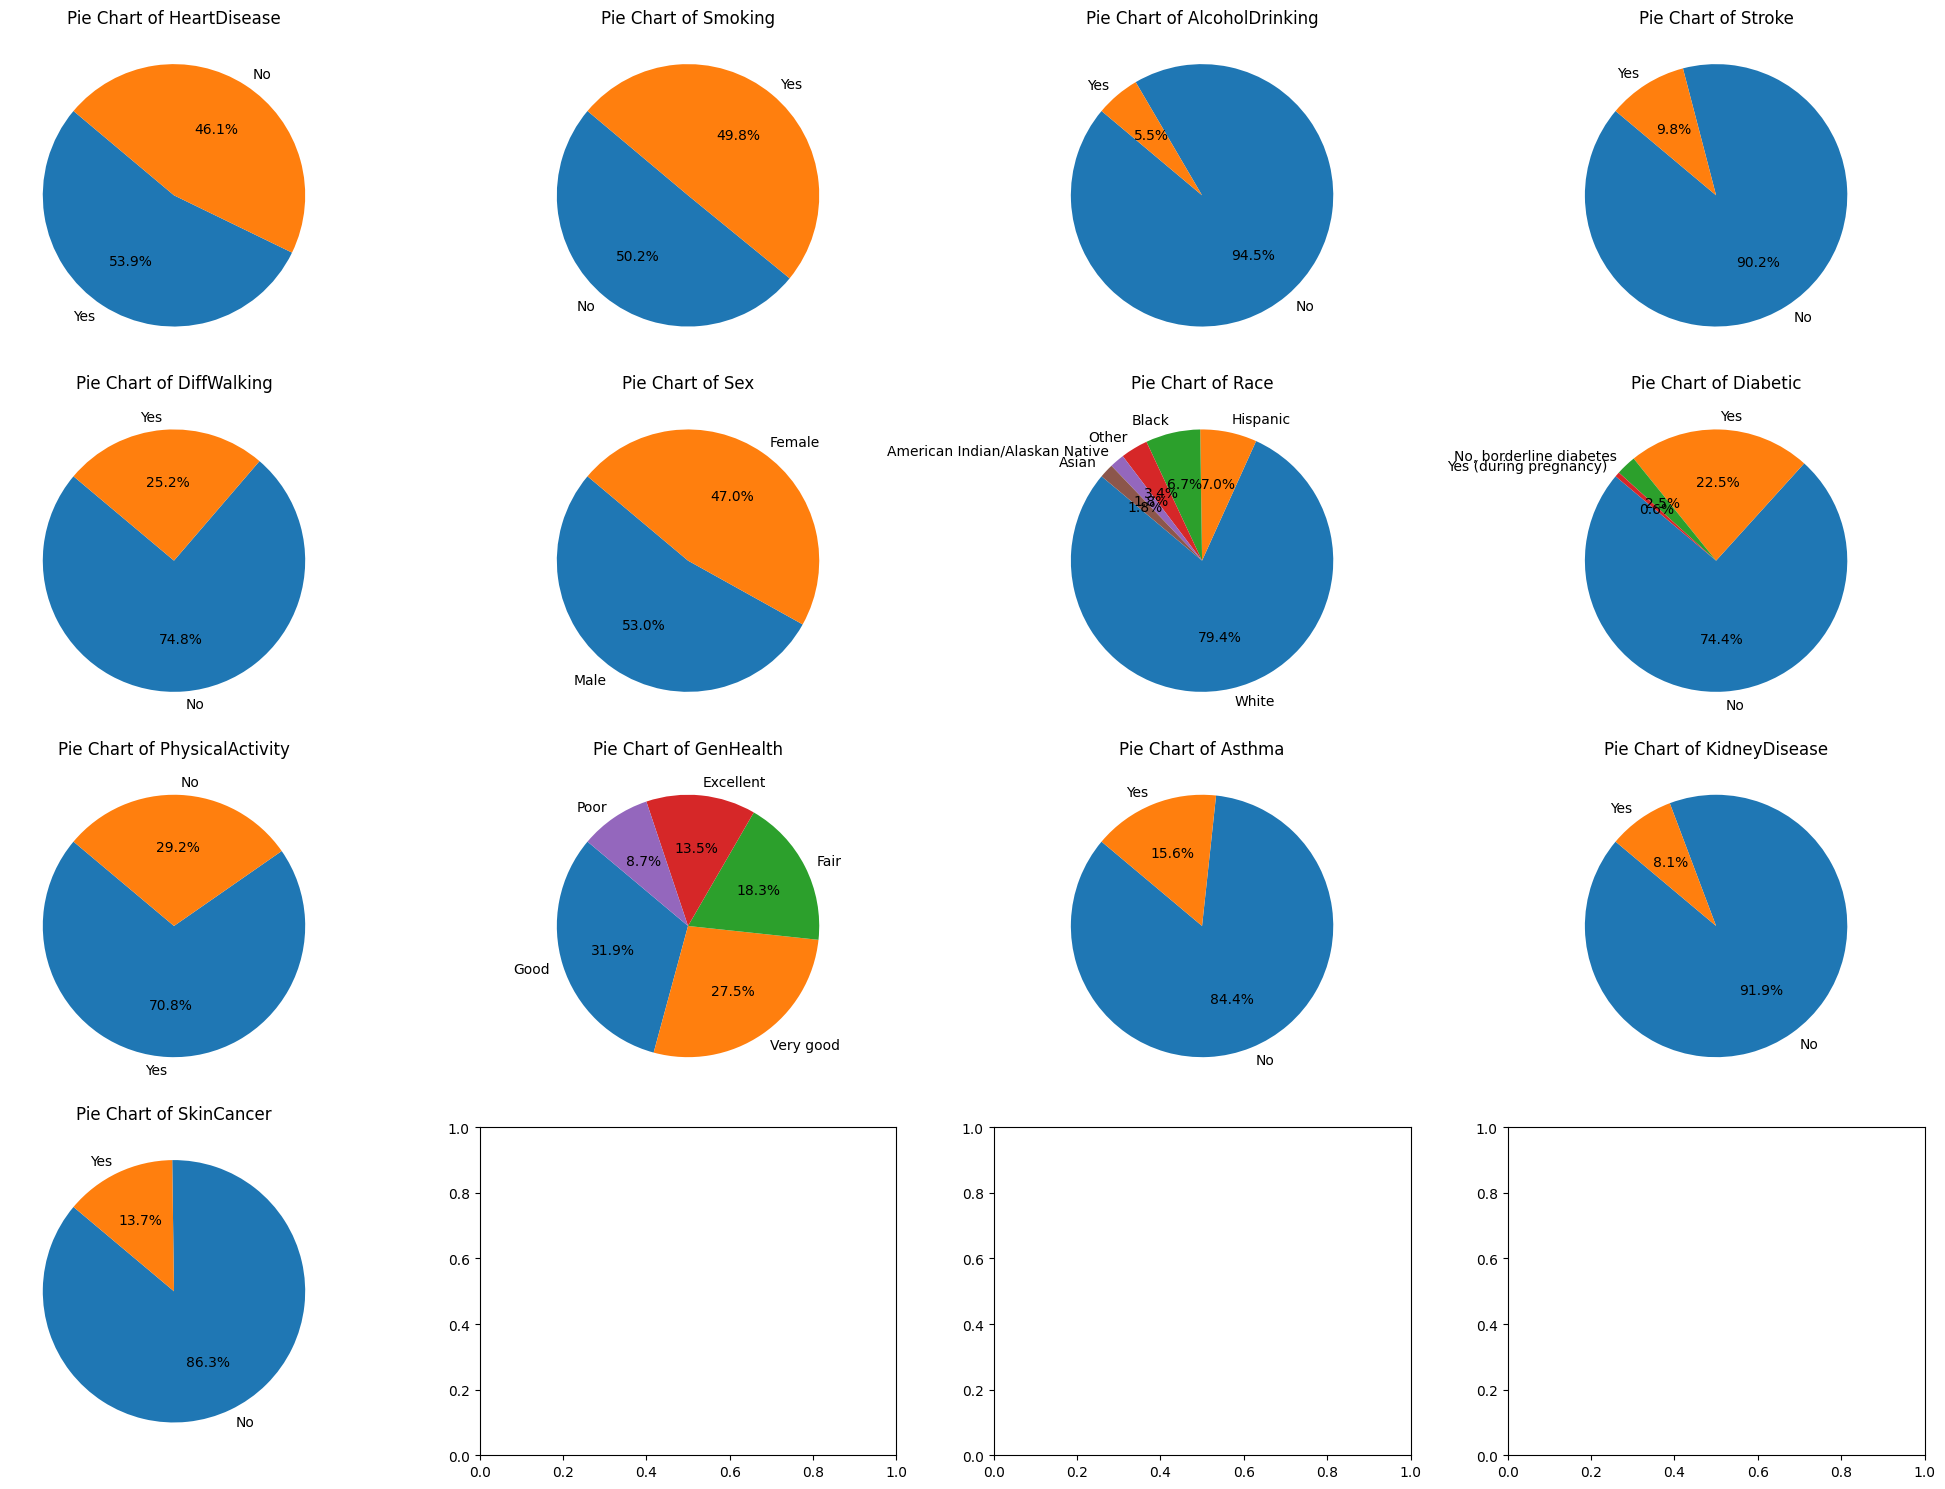

In [41]:
import matplotlib.pyplot as plt

binary_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))

for i, feature in enumerate(binary_features):
    counts = df[feature].value_counts()
    ax = axes[i // 4, i % 4]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Pie Chart of {feature}')

plt.tight_layout()
plt.show()


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=len(df.columns) // 2, ncols=2, figsize=(13, 20))

for idx, column in enumerate(df.drop(columns='HeartDisease')):
    row_idx = idx // 2
    col_idx = idx % 2

    sns.kdeplot(df[df["HeartDisease"] == 1][column], alpha=0.5, fill=True, color="#000CEB", label="HeartDisease", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["HeartDisease"] == 0][column], alpha=0.5, fill=True, color="#97B9F4", label="Normal", ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Heart Disease")

# Manually adding legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()    
# corr_matrix = df.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(corr_matrix, annot=True, cmap='Blues')
# plt.show()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,8,5,2,0,3,15.0,1,0,0
16,0,26.26,0,0,0,5.0,2.0,0,0,10,5,0,0,4,10.0,0,0,0
20,0,21.16,0,0,0,0.0,0.0,0,0,12,2,1,0,2,8.0,0,0,0
30,0,25.84,1,0,0,5.0,0.0,0,1,10,2,0,1,2,8.0,0,0,0


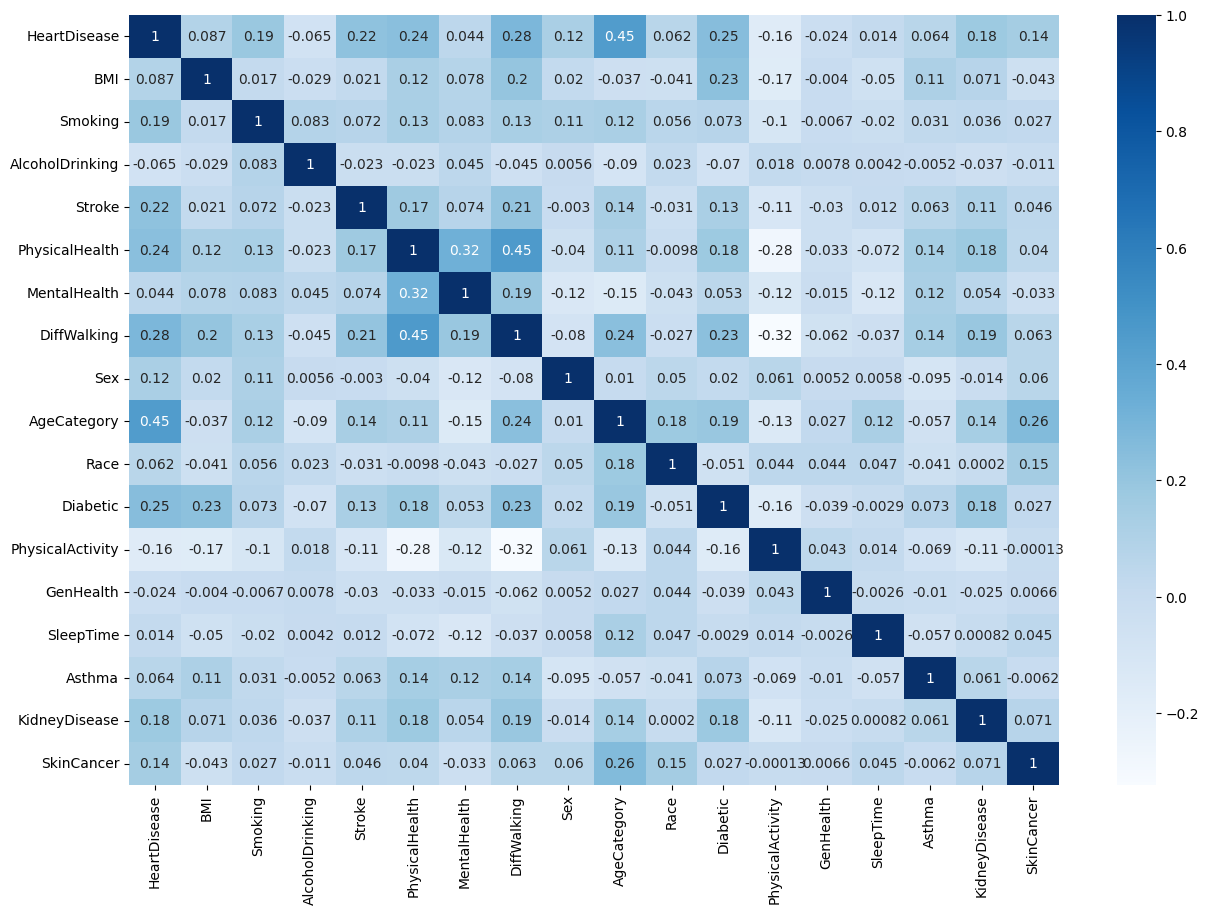

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

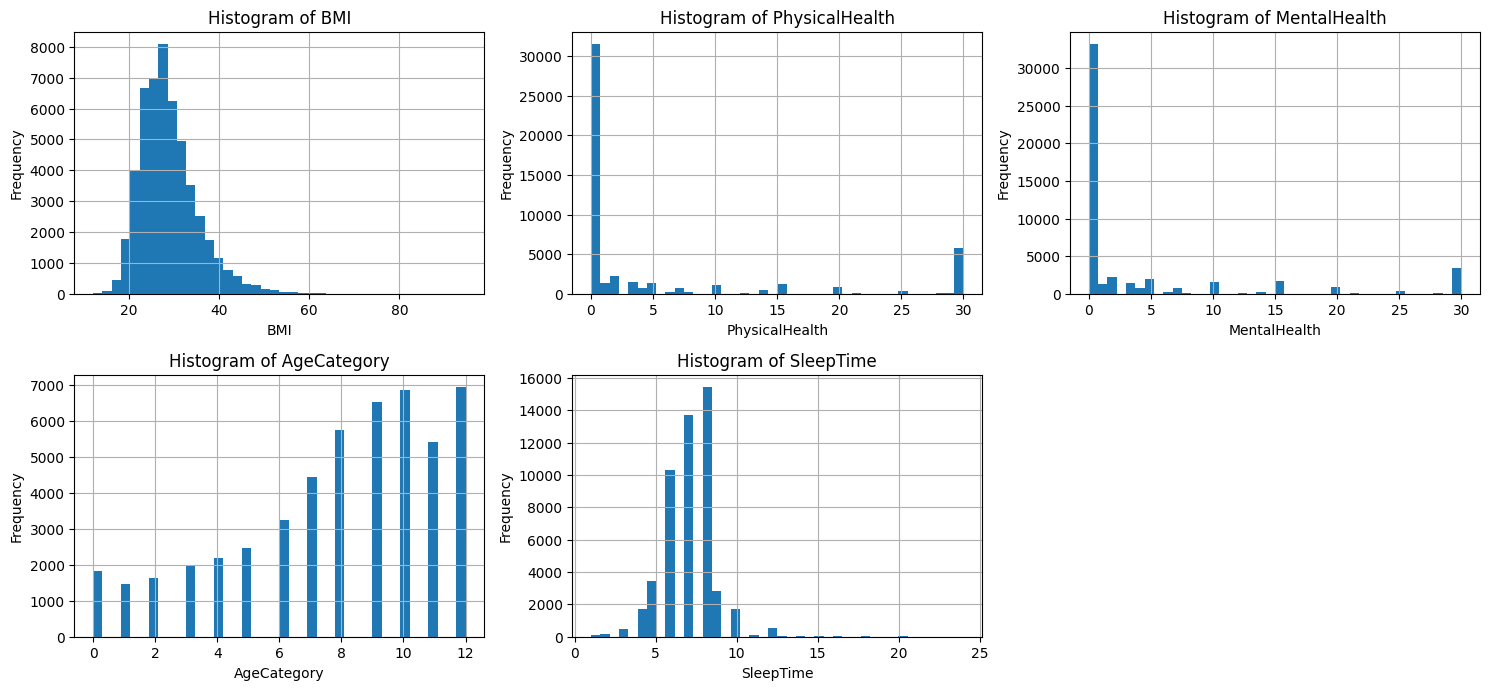

In [ ]:
import matplotlib.pyplot as plt

labels_of_interest = [ 'BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']

num_plots = len(labels_of_interest)
num_cols = 3
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10)) 
axes = axes.flatten()

for i, label in enumerate(labels_of_interest):
    df[label].hist(bins=40, ax=axes[i])
    axes[i].set_title(f'Histogram of {label}')
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Frequency')

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Random Forest classification using feature importances

By Selecting certain features we try to hypertune the more to produce higher accuracy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=['HeartDisease']) 
y = df['HeartDisease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=600, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set (using all features):", accuracy)
N = 10
feature_importances = rf_model.feature_importances_

# Select most important features
top_n_features_indices = feature_importances.argsort()[::-1][:N]
top_n_features_names = X.columns[feature_importances.argsort()[::-1][:N]]


print("Top", N, "most important features to heart diesease:")
for index, feature_name in zip(top_n_features_indices, top_n_features_names):
    print("Index:", index, " - Feature:", feature_name)
X_train_selected = X_train.iloc[:, top_n_features_indices]
X_test_selected = X_test.iloc[:, top_n_features_indices]

# train the Random Forest classifier with selected features
rf_model_selected = RandomForestClassifier(n_estimators=600, random_state=42)  
rf_model_selected.fit(X_train_selected, y_train)

# Predictions on the testing set using selected features
y_pred_selected = rf_model_selected.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on testing set (using selected features):", accuracy_selected)

Accuracy on testing set (using all features): 0.7532007090801655
Top 10 most important features to heart diesease:
Index: 0  - Feature: BMI
Index: 8  - Feature: AgeCategory
Index: 13  - Feature: SleepTime
Index: 12  - Feature: GenHealth
Index: 4  - Feature: PhysicalHealth
Index: 5  - Feature: MentalHealth
Index: 6  - Feature: DiffWalking
Index: 10  - Feature: Diabetic
Index: 9  - Feature: Race
Index: 7  - Feature: Sex
Accuracy on testing set (using selected features): 0.7298601536340359


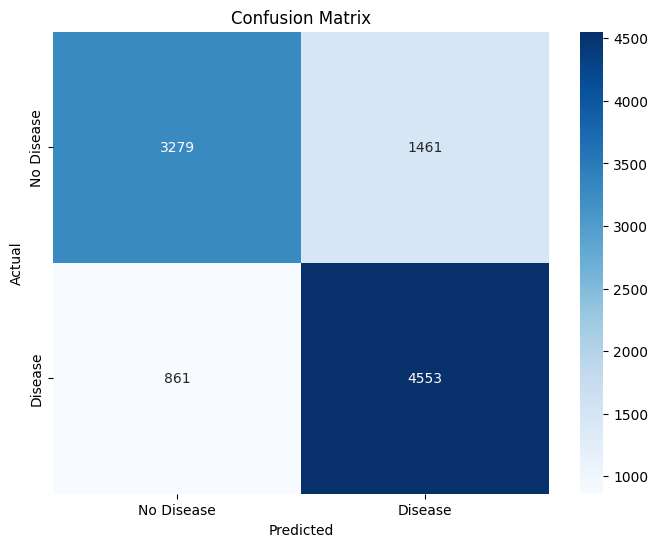

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#0.92 - 1461 861


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      4740
           1       0.76      0.84      0.80      5414

    accuracy                           0.77     10154
   macro avg       0.77      0.77      0.77     10154
weighted avg       0.77      0.77      0.77     10154



# Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['HeartDisease']) 
y = df['HeartDisease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=10000, random_state=42)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set (using all features):", accuracy)


Accuracy on testing set (using all features): 0.7541855426432933


# Confusion Matrix for Logistic Regression prediction

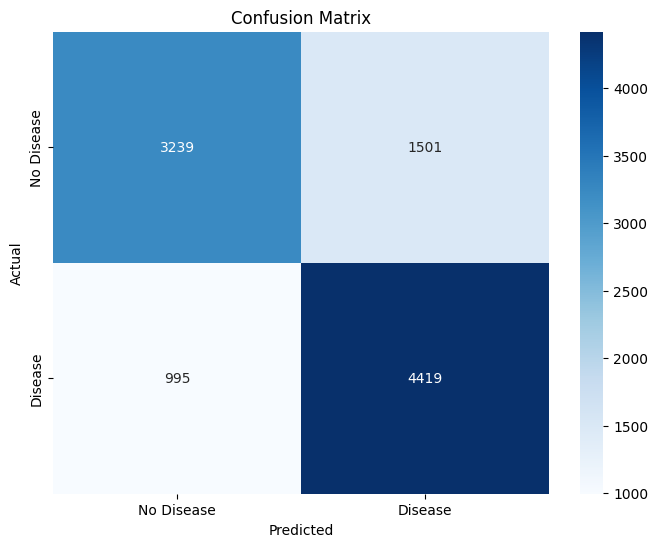

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





Precision recall

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision    recall  f1-score   support

#           0       0.76      0.68      0.72      4740
#          1       0.75      0.82      0.78      5414

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      4740
           1       0.75      0.82      0.78      5414

    accuracy                           0.75     10154
   macro avg       0.76      0.75      0.75     10154
weighted avg       0.76      0.75      0.75     10154



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns=['HeartDisease']) 
y = df['HeartDisease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set (using all features):", accuracy)

Accuracy on testing set (using all features): 0.6987394130391964


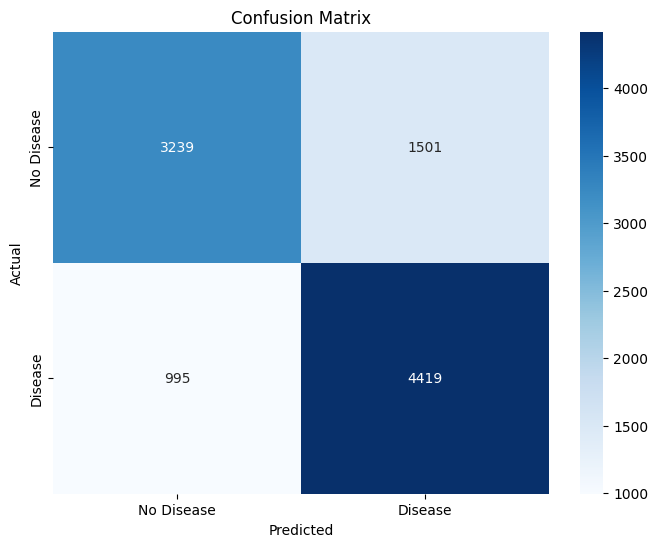

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#0.92 - 1501 995

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision    recall  f1-score   support

#        0       0.76      0.68      0.72      4740
#        1       0.75      0.82      0.78      5414

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      4740
           1       0.75      0.82      0.78      5414

    accuracy                           0.75     10154
   macro avg       0.76      0.75      0.75     10154
weighted avg       0.76      0.75      0.75     10154



# Nueral Network hypertuned using gridsearch to find the best parametres

In [ ]:
from sklearn.neural_network import MLPClassifier

X = df.drop(columns=['HeartDisease']) 
y = df['HeartDisease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.01, random_state=42, max_iter=1000)

mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set (using all features):", accuracy)


Accuracy on testing set (using all features): 0.7724049635611582


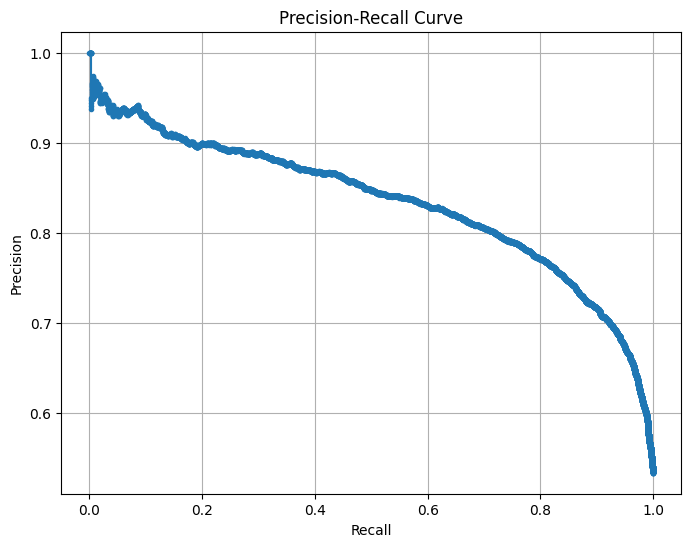

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve

X = df.drop(columns=['HeartDisease']) 
y = df['HeartDisease']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Fit the model
mlp_model.fit(X_train, y_train)

y_proba = mlp_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


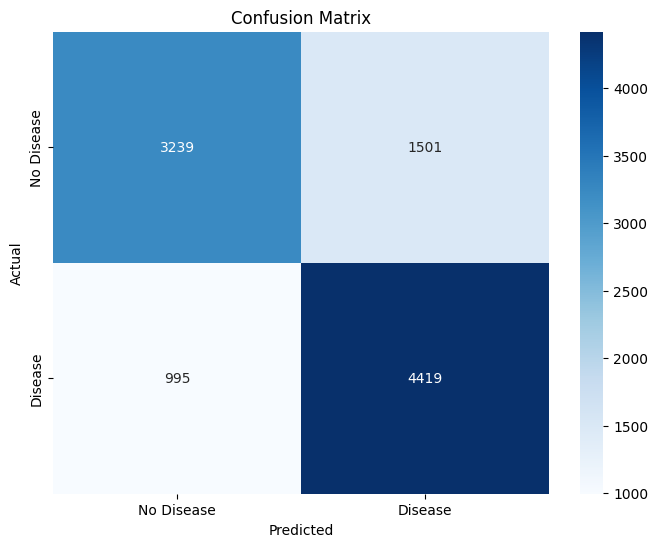

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#0.92 - 1501 995

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision    recall  f1-score   support
#0       0.76      0.68      0.72      4740
#1       0.75      0.82      0.78      5414

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      4740
           1       0.75      0.82      0.78      5414

    accuracy                           0.75     10154
   macro avg       0.76      0.75      0.75     10154
weighted avg       0.76      0.75      0.75     10154



## K-Nearest Neighbours , uses a for loop to identify best amount of neighbours to use to get highest accuaracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


X = df.drop(columns=['HeartDisease']) 
y = df['HeartDisease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ks = []
for i in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=i)

    # Fit the model
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    ks.append(accuracy)
    print(f"{i}: {accuracy}")

print("Accuracy on testing set:", max(ks))

1: 0.6628914713413433
2: 0.6384675989757731
3: 0.6995272798896986
4: 0.6867244435690368
5: 0.718928501083317
6: 0.7106558991530432
7: 0.7286783533582825
8: 0.7197163679338192
9: 0.7317313374039788
10: 0.7273980697262162
11: 0.7379357888516841
12: 0.7324207208981682
13: 0.7414811896789443
14: 0.7378373054953713
15: 0.7448296237935789
16: 0.7399054559779398
17: 0.7465038408508962
18: 0.7414811896789443
19: 0.7458144573567067
Accuracy on testing set: 0.7465038408508962


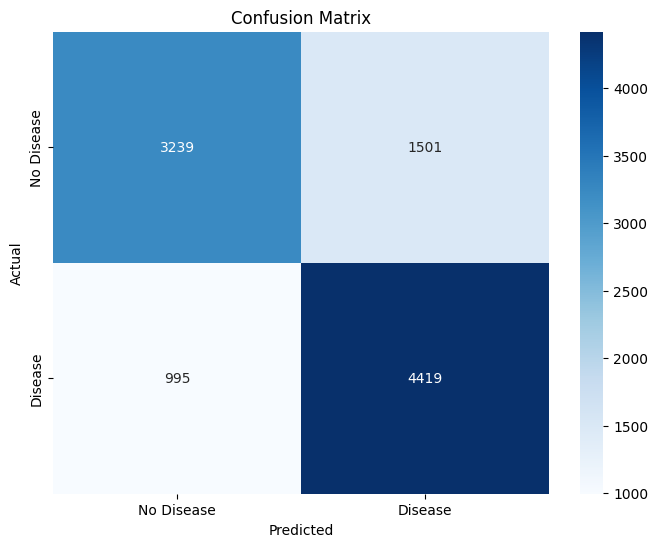

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#   precision    recall  f1-score   support

#           0       0.76      0.68      0.72      4740
#           1       0.75      0.82      0.78      5414


              precision    recall  f1-score   support

           0       0.76      0.68      0.72      4740
           1       0.75      0.82      0.78      5414

    accuracy                           0.75     10154
   macro avg       0.76      0.75      0.75     10154
weighted avg       0.76      0.75      0.75     10154



# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

#df_reduced = df.sample(frac=0.1, random_state=42)

# # Define a grid of hyperparameters to search over
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [5, 10, 15]
# }

# grid_search = GridSearchCV(gbm_model, param_grid, cv=5, scoring='accuracy', verbose=2)
# grid_search.fit(X_train, y_train)



# Initialize the Gradient Boosting classifier
gbm_model = GradientBoostingClassifier(n_estimators=166, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set:", accuracy)

# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# [CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   3.8s
# ...
# [CV] END ..learning_rate=0.2, max_depth=15, n_estimators=200; total time=  56.9s
# Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
# Accuracy on testing set with best model: 0.7694504628717747


#166 0.7744731140437267

Accuracy on testing set: 0.7713216466417175


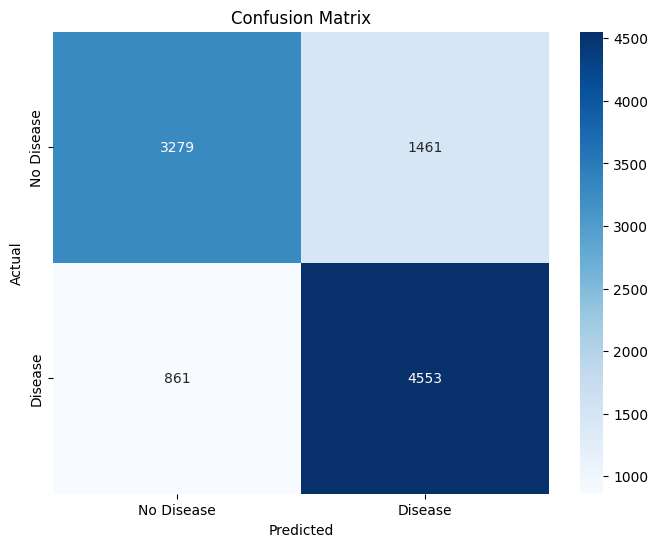

In [ ]:

# Create confusion matrix
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#  precision    recall  f1-score   support

#           0       0.76      0.68      0.72      4740
#           1       0.75      0.82      0.78      5414

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      4740
           1       0.75      0.82      0.78      5414

    accuracy                           0.75     10154
   macro avg       0.76      0.75      0.75     10154
weighted avg       0.76      0.75      0.75     10154

